# K-Means Clustering

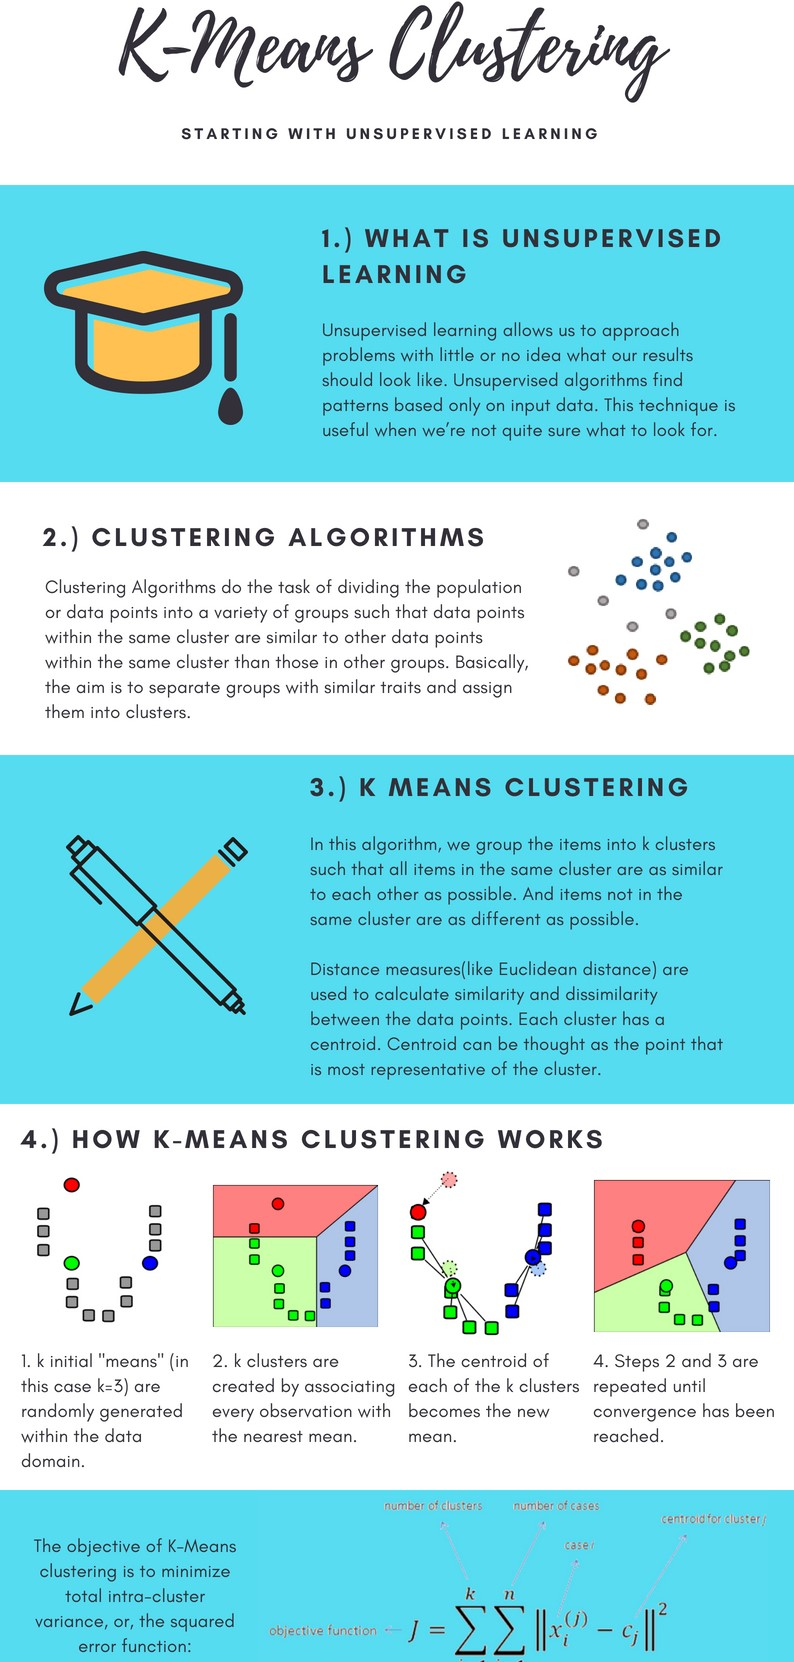

## Importing Libraries

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Importing Datasets.

In [17]:
dataset = pd.read_csv("datasets/Mall_Customers.csv")

In [18]:
X = dataset.iloc[:, [3,4]].values
Y = dataset.iloc[:, 3].values

## Spilitting the dataset into training and testing set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=0)

## Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Using the elbow method to find the optimal number of clusters

In [21]:
# import kMean from sklearn
from sklearn.cluster import KMeans

###  Plot elbow method graph

<function matplotlib.pyplot.show(close=None, block=None)>

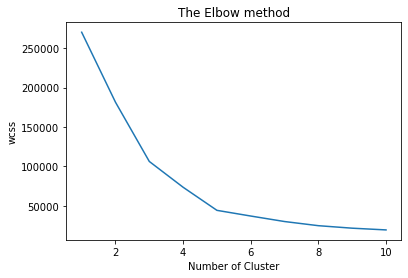

In [22]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

## Fitting K-Means to the dataset

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_train,Y_train)

KMeans(n_clusters=5, random_state=42)

## Predicting the Test set results

In [24]:
Y_pred = kmeans.predict(X_test)

## Visualising the clusters

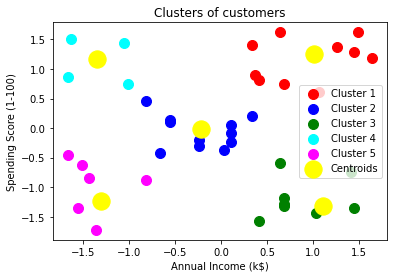

In [25]:
plt.scatter(X_test[Y_pred == 0, 0], X_test[Y_pred == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_test[Y_pred == 1, 0], X_test[Y_pred == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_test[Y_pred == 2, 0], X_test[Y_pred == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_test[Y_pred == 3, 0], X_test[Y_pred == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_test[Y_pred == 4, 0], X_test[Y_pred == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()